# Bird Strike Analysis

### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data reading

In [4]:
df=pd.read_csv('Bird Strikes data.csv')
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Unnamed: 26
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,23-11-2000 00:00,Caused damage,...,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes,NaN
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,25-07-2001 00:00,Caused damage,...,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No,NaN
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,14-09-2001 00:00,No damage,...,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No,NaN
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,05-09-2002 00:00,No damage,...,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes,NaN
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,23-06-2003 00:00,No damage,...,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25374,319672,Airplane,SACRAMENTO INTL,< 1000 ft,B-737-700,1,1,NaN,29-12-2011 00:00,No damage,...,ID BY SMITHSONIAN. SAMPLES FROM BOTH A/C AND B...,Medium,No Cloud,Mallard,Y,0,10,0,Yes,NaN
25375,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,30-12-2011 00:00,No damage,...,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,"1,500",0,No,NaN
25376,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,30-12-2011 00:00,No damage,...,NaN,Small,Some Cloud,Tree swallow,Y,0,0,0,No,NaN
25377,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,31-12-2011 00:00,No damage,...,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0,0,Yes,NaN


In [5]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                                 1
Airport: Name                                  4
Altitude bin                                   0
Aircraft: Make/Model                           0
Wildlife: Number struck                        1
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23316
FlightDate                                     1
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 205
Aircraft: Airline/Operator                     1
Origin State                                 434
When: Phase of flight                          1
Conditions: Precipitation                  23371
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4740
Wildlife: Size                                 1
Conditions: Sky                                0
Wildlife: Species   

In [6]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Unnamed: 26'],
      dtype='object')

### Data Info

In [6]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [22]:
cols = ['Record ID', 'Aircraft: Type','Remarks']
df = df.drop(columns=cols)

### Data Pre-Processing

In [8]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'].str.replace(',', ''), errors='coerce')
print(df['Feet above ground'].dtype) 

float64


### Random Forest Classification

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


df = df.dropna(how='all', subset=['Altitude bin', 'Aircraft: Make/Model', 'Wildlife: Size','Conditions: Sky', 'When: Phase of flight', 'Feet above ground', 'Is Aircraft Large?'])
df['Altitude bin'] = df['Altitude bin'].replace({'< 1000 ft': '1000'})  
df['Altitude bin'] = pd.to_numeric(df['Altitude bin'], errors='coerce')  
df = df.dropna(axis=1, how='all')
features = ['Altitude bin', 'Aircraft: Make/Model', 'Wildlife: Size', 'Conditions: Sky','When: Phase of flight', 'Feet above ground', 'Is Aircraft Large?']
target = 'Effect: Impact to flight'
df[target] = df[target].astype('category')

X = df[features]
y = df[target]
numerical_features = ['Feet above ground']
categorical_features = ['Altitude bin', 'Aircraft: Make/Model', 'Wildlife: Size', 'Conditions: Sky','When: Phase of flight', 'Is Aircraft Large?']

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_features),('cat', categorical_transformer, categorical_features)])
y_encoded = y.cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
missing_rows = df[df[target].isnull()]

if not missing_rows.empty:
    missing_predictions = model.predict(missing_rows[features])
    missing_predictions_decoded = y.cat.categories[missing_predictions]
    df.loc[df[target].isnull(), target] = missing_predictions_decoded

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.97      0.95      4673
           0       0.28      0.09      0.13        91
           1       0.00      0.00      0.00        17
           2       0.07      0.01      0.02        74
           3       0.34      0.24      0.28       221

    accuracy                           0.91      5076
   macro avg       0.33      0.26      0.28      5076
weighted avg       0.88      0.91      0.89      5076



### K-means Clustering

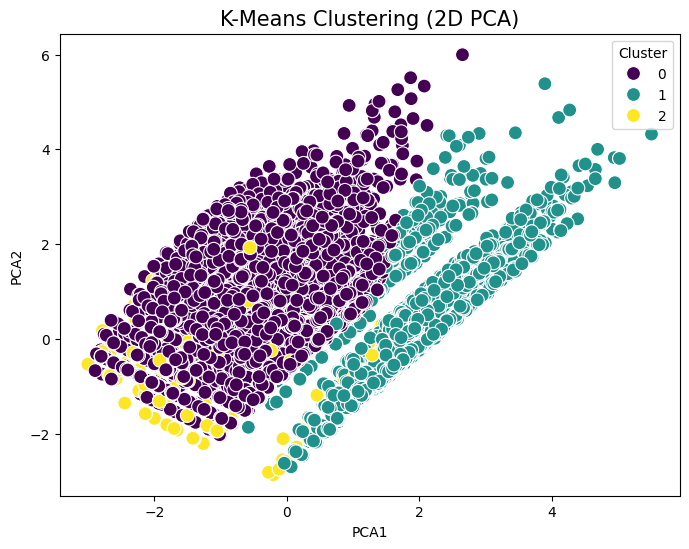

Cluster Distribution:
Cluster
0    16384
1     8433
2      562
Name: count, dtype: int64

Cluster Centers:
[[ 0.00000000e+00  3.88346235e-01  6.26797267e-03  3.82855765e-02
   6.32843677e-02 -1.44356423e-01 -7.03244435e-01  1.48075318e-01]
 [ 0.00000000e+00 -7.58984156e-01 -4.31771174e-03 -9.21432995e-02
  -1.31223936e-01  2.96132313e-01  1.37139806e+00  1.43573987e-01]
 [ 0.00000000e+00  9.18445319e-02 -1.17715610e-01  2.69285953e-01
   1.28281977e-01 -2.44544524e-01 -1.20887375e-01 -6.47112353e+00]]

Cluster Summary (Mean for Numerical, Mode for Categorical):
        Feet above ground  Altitude bin  Aircraft: Make/Model  Wildlife: Size  \
Cluster                                                                         
0              551.645874             0                   140               2   
1             1310.283648             0                    37               2   
2              373.951957             0                   140               2   

         Conditions: Sky  

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

features = ['Altitude bin', 'Aircraft: Make/Model', 'Wildlife: Size', 'Conditions: Sky','When: Phase of flight', 'Feet above ground', 'Is Aircraft Large?', 'Conditions: Precipitation']
df = df.dropna(how='all', subset=features)
df['Altitude bin'] = df['Altitude bin'].replace({'< 1000 ft': '1000'})
df['Altitude bin'] = pd.to_numeric(df['Altitude bin'], errors='coerce')

imputer = SimpleImputer(strategy='most_frequent')
df[features] = imputer.fit_transform(df[features])

label_encoder = LabelEncoder()
for col in ['Altitude bin', 'Aircraft: Make/Model', 'Wildlife: Size', 'Conditions: Sky','When: Phase of flight', 'Is Aircraft Large?', 'Conditions: Precipitation']:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('K-Means Clustering (2D PCA)', fontsize=15)
plt.show()
print("Cluster Distribution:")
print(df['Cluster'].value_counts())
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

numerical_columns = ['Feet above ground']  
categorical_columns = ['Altitude bin', 'Aircraft: Make/Model', 'Wildlife: Size', 'Conditions: Sky','When: Phase of flight','Is Aircraft Large?','Conditions: Precipitation']
numerical_summary = df.groupby('Cluster')[numerical_columns].mean()
categorical_summary = df.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])
cluster_summary = pd.concat([numerical_summary, categorical_summary], axis=1)
print("\nCluster Summary (Mean for Numerical, Mode for Categorical):")
print(cluster_summary)

In [25]:
cols = ['Unnamed: 26']
df = df.drop(columns=cols) 
df.isnull().sum()

Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above ground                          0
Number of people injured                   0
Is Aircraf

In [26]:
df.head(10)

,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,...,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Cluster,Month
0,LAGUARDIA NY,0,34,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,US AIRWAYS*,...,1,0,Unknown bird - medium,N,"30,736",1500.0,0,1,1,2000-11
1,DALLAS/FORT WORTH INTL ARPT,0,254,Over 100,424,Precautionary Landing,2001-07-25,Caused damage,2,AMERICAN AIRLINES,...,2,2,Rock pigeon,Y,0,0.0,0,0,0,2001-07
2,LAKEFRONT AIRPORT,0,117,Over 100,261,Precautionary Landing,2001-09-14,No damage,2,BUSINESS,...,2,0,European starling,N,0,50.0,0,0,0,2001-09
3,SEATTLE-TACOMA INTL,0,34,Over 100,806,Precautionary Landing,2002-09-05,No damage,2,ALASKA AIRLINES,...,2,2,European starling,Y,0,50.0,0,1,1,2002-09
4,NORFOLK INTL,0,140,Over 100,942,Precautionary Landing,2003-06-23,No damage,2,COMAIR AIRLINES,...,2,0,European starling,N,0,50.0,0,0,0,2003-06
6,NEW CASTLE COUNTY,0,238,Over 100,227,Other,2003-08-17,Caused damage,2,BUSINESS,...,2,0,European starling,N,"14,81,711",150.0,0,0,0,2003-08
7,WASHINGTON DULLES INTL ARPT,0,6,Over 100,320,Other,2006-03-01,Caused damage,2,UNITED AIRLINES,...,2,2,European starling,Y,"14,83,141",100.0,0,0,0,2006-03
8,ATLANTA INTL,0,167,2 to 10,9,Aborted Take-off,2000-01-06,No damage,2,AIRTRAN AIRWAYS,...,2,2,Rock pigeon,N,0,0.0,0,0,0,2000-01
9,ORLANDO SANFORD INTL AIRPORT,0,8,2 to 10,4,Precautionary Landing,2000-01-07,No damage,2,AIRTOURS INTL,...,2,2,Unknown bird - small,N,0,0.0,0,0,0,2000-01
10,ONTARIO INTL ARPT,0,6,2 to 10,3,Precautionary Landing,2000-01-08,No damage,2,AMERICA WEST AIRLINES,...,2,2,Rock pigeon,N,0,200.0,0,0,0,2000-01


### Timeline of Bird Strike

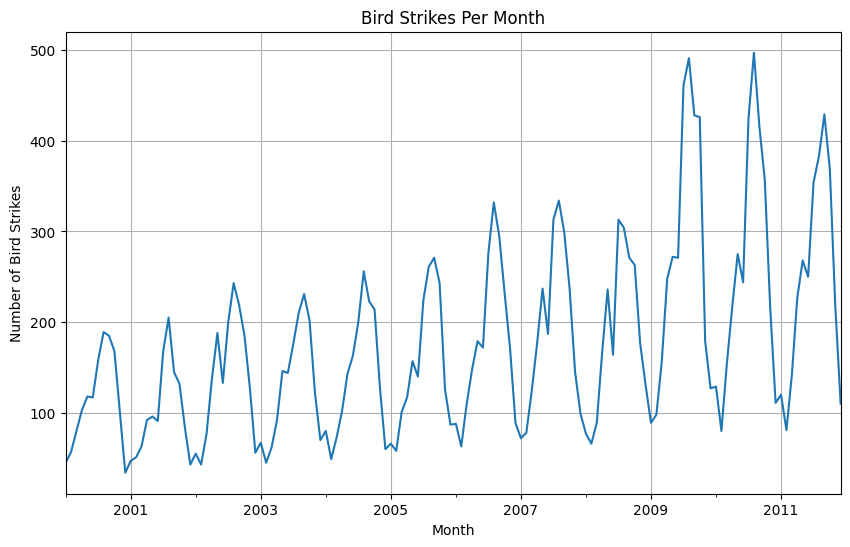

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['FlightDate'])
df['Month'] = df['FlightDate'].dt.to_period('M')  
monthly_data = df.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_data.plot()
plt.title('Bird Strikes Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

### Monthly basis predictions

                               SARIMAX Results                                
Dep. Variable:           Bird Strikes   No. Observations:                  115
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -598.766
Date:                Sat, 07 Dec 2024   AIC                           1209.531
Time:                        22:51:02   BIC                           1225.948
Sample:                             0   HQIC                          1216.194
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1583      0.102      1.547      0.122      -0.042       0.359
ar.L2          0.0843      0.124      0.679      0.497      -0.159       0.327
ar.L3          0.0846      0.133      0.635      0.5

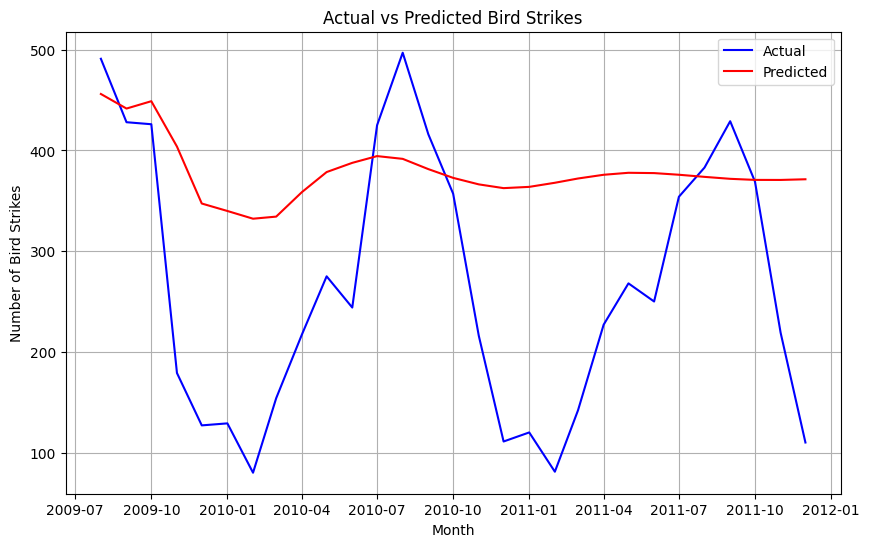

Mean Absolute Error (MAE): 130.57587334294945


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

monthly_data = df.groupby('Month').size() 
monthly_data = monthly_data.reset_index(name='Bird Strikes') 
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()
train_size = int(len(monthly_data) * 0.8)
train, test = monthly_data['Bird Strikes'][:train_size], monthly_data['Bird Strikes'][train_size:]
train_dates, test_dates = monthly_data['Month'][:train_size], monthly_data['Month'][train_size:]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

predictions = model_fit.forecast(steps=len(test))
plt.figure(figsize=(10, 6))
plt.plot(test_dates, test, label='Actual', color='blue')
plt.plot(test_dates, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Bird Strikes')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.legend()
plt.grid(True)
plt.show()

mae = mean_absolute_error(test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

In [15]:
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)

       Record ID Aircraft: Type                    Airport: Name  \
0         202152       Airplane                     LAGUARDIA NY   
1         208159       Airplane      DALLAS/FORT WORTH INTL ARPT   
2         207601       Airplane                LAKEFRONT AIRPORT   
3         215953       Airplane              SEATTLE-TACOMA INTL   
4         219878       Airplane                     NORFOLK INTL   
...          ...            ...                              ...   
25374     319672       Airplane                  SACRAMENTO INTL   
25375     321151       Airplane                REDDING MUNICIPAL   
25376     319677       Airplane                     ORLANDO INTL   
25377     319679       Airplane  DETROIT METRO WAYNE COUNTY ARPT   
25378     319593       Airplane     ABRAHAM LINCOLN CAPITAL ARPT   

       Altitude bin  Aircraft: Make/Model Wildlife: Number struck  \
0                 0                    34                Over 100   
1                 0                   254    

In [24]:
df = df.dropna(subset=['Aircraft: Number of engines?', 'Origin State'])
print(df.isnull().sum())

Airport: Name                                  0
Altitude bin                                   0
Aircraft: Make/Model                           0
Wildlife: Number struck                        0
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                       0
FlightDate                                     0
Effect: Indicated Damage                       0
Aircraft: Number of engines?                   0
Aircraft: Airline/Operator                     0
Origin State                                   0
When: Phase of flight                          0
Conditions: Precipitation                      0
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Wildlife: Size                                 0
Conditions: Sky                                0
Wildlife: Species                              0
Pilot warned of birds or wildlife?             0
Cost: Total $                                  0
Feet above ground   

### Sample data

In [17]:
df_new = df.head(2000)
df_new = df_new.copy()
df_new.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Unnamed: 26,Cluster,Month
0,202152,Airplane,LAGUARDIA NY,0,34,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,0,Unknown bird - medium,N,"30,736",1500.0,0,1,NaN,1,2000-11
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,0,254,Over 100,424,Precautionary Landing,2001-07-25,Caused damage,...,2,Rock pigeon,Y,0,0.0,0,0,NaN,0,2001-07
2,207601,Airplane,LAKEFRONT AIRPORT,0,117,Over 100,261,Precautionary Landing,2001-09-14,No damage,...,0,European starling,N,0,50.0,0,0,NaN,0,2001-09
3,215953,Airplane,SEATTLE-TACOMA INTL,0,34,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,2,European starling,Y,0,50.0,0,1,NaN,1,2002-09
4,219878,Airplane,NORFOLK INTL,0,140,Over 100,942,Precautionary Landing,2003-06-23,No damage,...,0,European starling,N,0,50.0,0,0,NaN,0,2003-06


### Data Insights

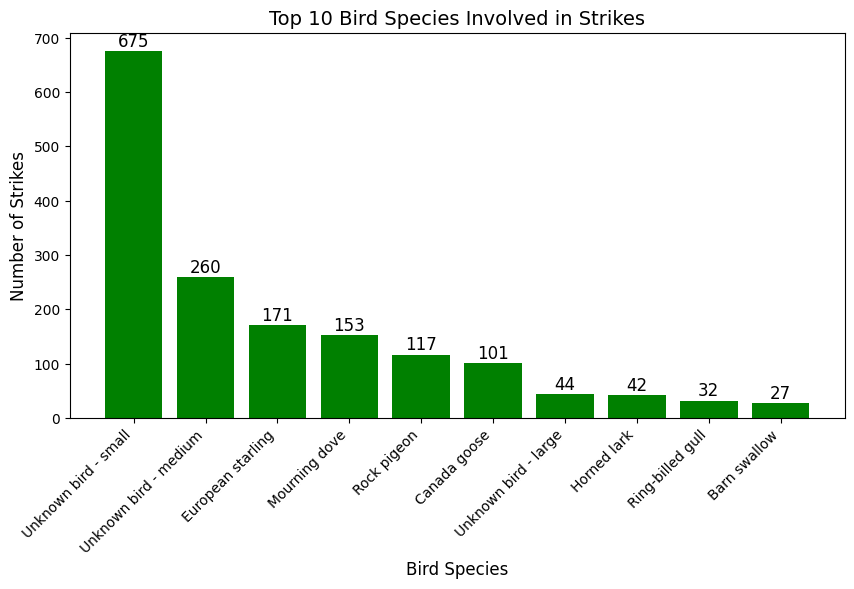

In [18]:
bird_species_counts = df_new['Wildlife: Species'].value_counts().head(10)

plt.figure(figsize=(10, 5))
bars = plt.bar(bird_species_counts.index, bird_species_counts.values, color='green')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,bar.get_height() + 1,str(bar.get_height()),ha='center', va='bottom', fontsize=12)

plt.title("Top 10 Bird Species Involved in Strikes", fontsize=14)
plt.xlabel("Bird Species", fontsize=12)
plt.ylabel("Number of Strikes", fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.show()

### No linear relationship between altitude and damage cost.

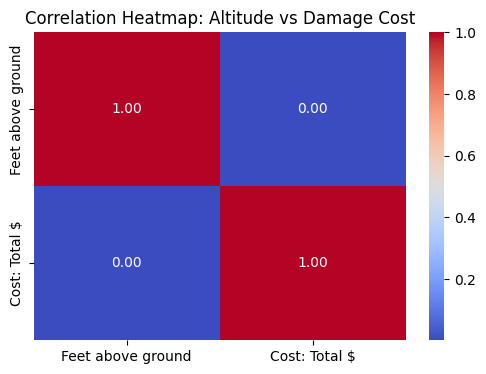

In [20]:
selected_columns = df_new[['Feet above ground', 'Cost: Total $']]

df_new['Cost: Total $'] = df_new['Cost: Total $'].astype(str).str.replace(',', '').astype(float)
df_new['Feet above ground'] = df_new['Feet above ground'].astype(str).str.replace(',', '').astype(float)

correlation = selected_columns.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap: Altitude vs Damage Cost")
plt.show()

### Particular Season Affect on Bird Strike

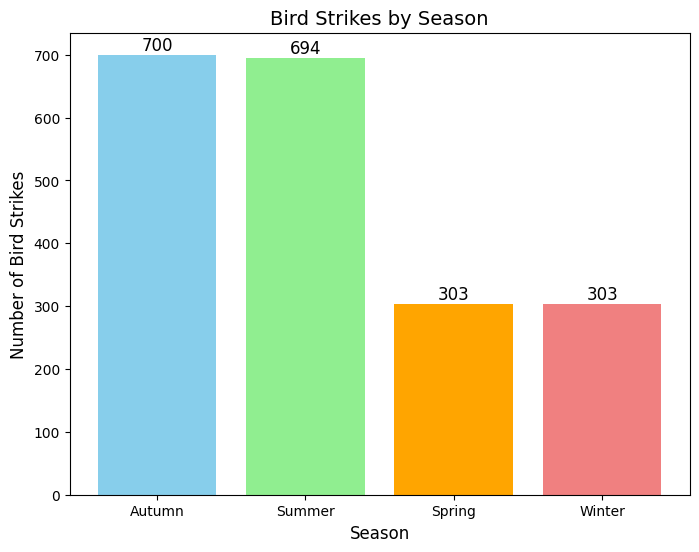

In [21]:
df_new['FlightDate'] = pd.to_datetime(df_new['FlightDate'], errors='coerce')

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df_new['Season'] = df_new['FlightDate'].dt.month.apply(get_season)
season_counts = df_new['Season'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(season_counts.index, season_counts.values, color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,bar.get_height() + 1,str(bar.get_height()),ha='center', va='bottom', fontsize=12)

plt.title("Bird Strikes by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Bird Strikes", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [36]:
df_new.to_excel('Bird_Strike_cleaned.xlsx')